In [121]:
import pandas as pd
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from time import time

In [122]:
data_train=pd.read_csv("./mnist_train.csv")
data_test=pd.read_csv("./mnist_test.csv")

In [123]:
data_test.shape

(10000, 785)

In [124]:
undersampling_train_data=resample(data_train,replace=False,n_samples=10000,random_state=42)

In [131]:
#Split data
X_train=undersampling_train_data[data_train.columns[1:]] 
y_train=undersampling_train_data['label']
X_test=data_test[data_test.columns[1:]]
y_test=data_test['label']

In [134]:
#Scaling data
scaler = MinMaxScaler(feature_range=(0,1)) 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
tsne=TSNE(random_state=42,n_components=2,verbose=0).fit_transform(X_test)

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

  warnings.warn(

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

  warnings.warn(


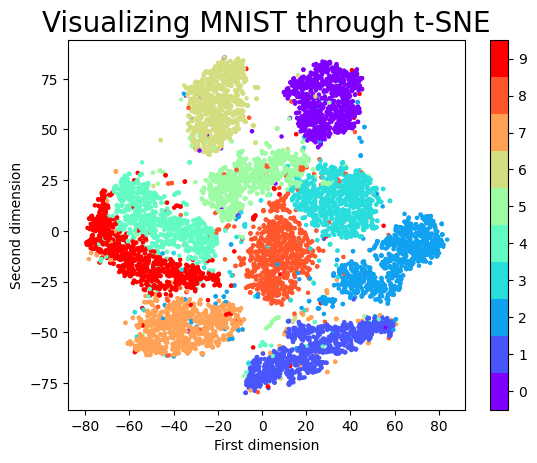

In [74]:
#Visualizing mnist with t-SNE 
plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s= 5, c=y_test, cmap='rainbow')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through t-SNE', fontsize=20);
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.show()

In [142]:
# Building the clustering model 
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import adjusted_rand_score
# Spectral Clustering 
spectral_clust_5=SpectralClustering(n_clusters = 5, affinity= 'nearest_neighbors', n_neighbors=10,random_state=42) 
  
# Training the model and Storing the predicted cluster labels 
labels_5 = spectral_clust_5.fit_predict(X_test)
print("Adjusted Rand index: ", adjusted_rand_score(y_test,labels_5))

Adjusted Rand index:  0.41379321748883147


In [97]:
# tsne_results=pd.DataFrame(tsne,columns=["dimension_1","dimension_2"])
# tsne_results.head()

,dimension_1,dimension_2
0,-32.036900,-52.158848
1,43.216751,-30.445765
2,26.023201,-55.751133
3,28.192057,49.487041
4,-51.493874,16.024069


In [108]:
# X_test.shape

(10000, 784)

<AxesSubplot: >

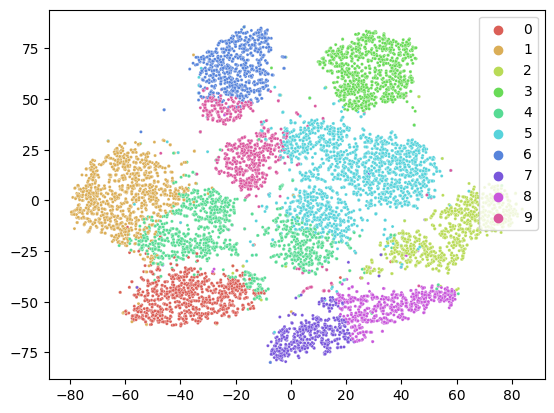

In [109]:
# sns.scatterplot(data=tsne_results,x=tsne[:,0],y=tsne[:,1],hue=labels_10,s=5,palette=sns.hls_palette(10))

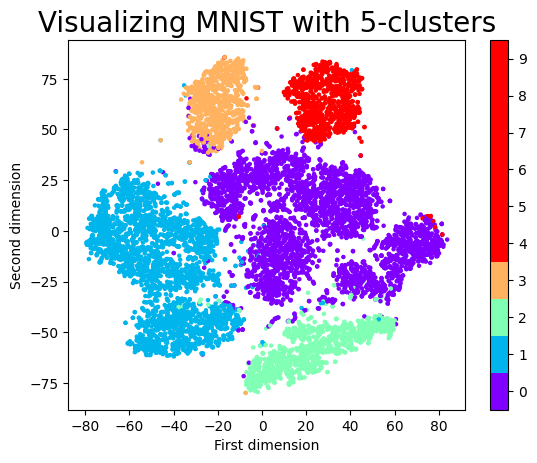

In [143]:
plt.scatter(x=tsne[:,0],y=tsne[:,1], s= 5, c=labels_5, cmap='rainbow')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST with 5-clusters', fontsize=20);
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.show()

In [115]:
# Building the clustering model with 15-clusters
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import adjusted_rand_score
# Spectral Clustering 
spectral_clust_10=SpectralClustering(n_clusters = 10, affinity ='nearest_neighbors',random_state=42) 
  
# Training the model and Storing the predicted cluster labels 
labels_10 = spectral_clust_10.fit_predict(X_test)
print("Adjusted Rand index: ", adjusted_rand_score(y_test,labels_10))

Adjusted Rand index:  0.5599406827048455


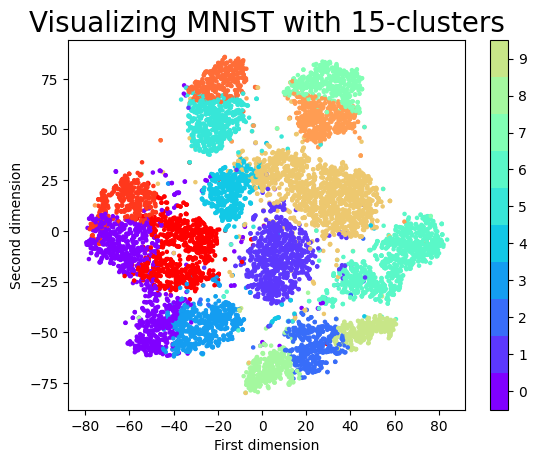

In [116]:
plt.scatter(x=tsne[:,0],y=tsne[:,1], s= 5, c=labels_10, cmap='rainbow')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST with 10-clusters', fontsize=20);
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.show()

In [119]:
# Building the clustering model with 4-clusters
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import adjusted_rand_score
# Spectral Clustering 
spectral_clust_15=SpectralClustering(n_clusters = 15, affinity ='nearest_neighbors',random_state=42) 
  
# Training the model and Storing the predicted cluster labels 
labels_15 = spectral_clust_15.fit_predict(X_test)
print("Adjusted Rand index: ", adjusted_rand_score(y_test,labels_15))

Adjusted Rand index:  0.28214638989002


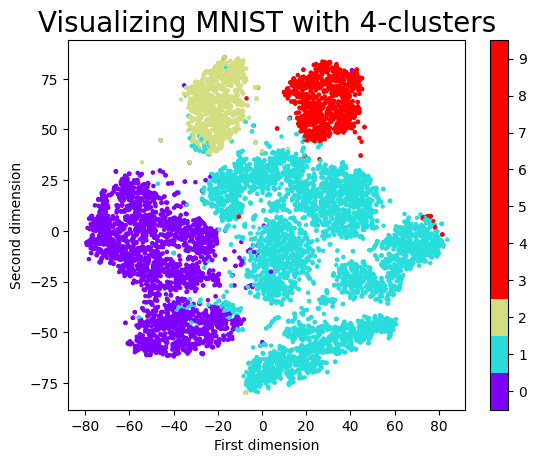

In [120]:
plt.scatter(x=tsne[:,0],y=tsne[:,1], s= 5, c=labels_15, cmap='rainbow')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST with 15-clusters', fontsize=20);
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.show()